In [1]:
#Importing libraries
import pandas as pd
import numpy as np 
import re

In [2]:
data=pd.read_csv("responses.csv")
data.head(3)

,Timestamp,1.Gender,2.Age,3.Occupation:,4.Educational Level:,5.Ethnicity,6.How frequently do you use money remittance services?,7.How many money remittance service(s) do you currently use?,8.Which money remittance service(s) do you use,9.How did you become aware of the money remittance service(s) you use?,10.How often are you exposed to these advertisements?,11.How would you rate the effectiveness of these advertisements you are exposed to,12.Do you think the content of the advertisements align with your expectations,13.How satisfied are you with the money remittance service you currently use?,14.To what extent do you feel loyal to the money remittance service you use?,Additional Comments\nIs there anything specific about the advertising of the money remittance service that has positively or negatively influenced your perceptions or loyalty?
0,1/11/2024 15:30:33,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,4.0,NaN
1,1/11/2024 18:53:30,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,4.0,NaN
2,1/11/2024 18:56:49,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,3.0,NaN


In [3]:
#nbr rows vs columns
data.shape

(45, 16)

# Data Cleaning

In [4]:
#Dropping irrelevant columns
data.drop(['Timestamp','Additional Comments\nIs there anything specific about the advertising of the money remittance service that has positively or negatively influenced your perceptions or loyalty?'], inplace=True, axis=1)
data.head(3)
#data.shape

,1.Gender,2.Age,3.Occupation:,4.Educational Level:,5.Ethnicity,6.How frequently do you use money remittance services?,7.How many money remittance service(s) do you currently use?,8.Which money remittance service(s) do you use,9.How did you become aware of the money remittance service(s) you use?,10.How often are you exposed to these advertisements?,11.How would you rate the effectiveness of these advertisements you are exposed to,12.Do you think the content of the advertisements align with your expectations,13.How satisfied are you with the money remittance service you currently use?,14.To what extent do you feel loyal to the money remittance service you use?
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,4.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,4.0
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,3.0


In [5]:
#Renaming column names to meaningful names
columns = ["Gender", "Age", "Occupation", "Educational level", "Ethnicity", "Remittance Frequency","Remittance Service Count","Remittance Service","Ad Channel","Ad Exposure","Ad_Effectiveness rating","Ad_Content_rating","User_Satisfaction","Remittance_loyalty"]
data.columns = columns
data.head(3)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Remittance_loyalty
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,4.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,4.0
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,3.0


In [6]:
#finding columns with null values
null_cols = data.isnull().sum()
null_cols

Gender                       0
Age                          0
Occupation                   0
Educational level            0
Ethnicity                    0
Remittance Frequency         0
Remittance Service Count     1
Remittance Service           1
Ad Channel                   2
Ad Exposure                  0
Ad_Effectiveness rating      1
Ad_Content_rating            1
User_Satisfaction            1
Remittance_loyalty          30
dtype: int64

In [7]:
#Drop 'remittance loyalty" due to lack of data
data.drop(['Remittance_loyalty'], inplace=True, axis=1)
data.head(3)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0


In [8]:
#Checking data types
data.dtypes

Gender                       object
Age                          object
Occupation                   object
Educational level            object
Ethnicity                    object
Remittance Frequency         object
Remittance Service Count     object
Remittance Service           object
Ad Channel                   object
Ad Exposure                  object
Ad_Effectiveness rating     float64
Ad_Content_rating            object
User_Satisfaction           float64
dtype: object

In [9]:
# Convert Remittance Service Count' to integers, non-convertible values will become NaN
data['Remittance Service Count']= pd.to_numeric(data['Remittance Service Count'], errors='coerce')

# Replace NaN values with a default value (0)
data['Remittance Service Count'].fillna(0, inplace=True)

In [10]:
#filtering for rows with people who do not use remittance 
data.drop(data[data['Remittance Service Count'] == 0.0].index, inplace=True)

In [11]:
#Checking columns with null values
null_cols = data.isnull().sum()
null_cols

Gender                      0
Age                         0
Occupation                  0
Educational level           0
Ethnicity                   0
Remittance Frequency        0
Remittance Service Count    0
Remittance Service          0
Ad Channel                  1
Ad Exposure                 0
Ad_Effectiveness rating     0
Ad_Content_rating           0
User_Satisfaction           0
dtype: int64

In [12]:
#Represent Ad content rating with the linear scale
data['Ad_Content_rate'] = data['Ad_Content_rating'].replace({'Strongly agree':5,'Agree':4,'Neutral':3,'Disagree':2,'Strongly disagree':1})
data.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5


In [20]:
#Replacing
data['Ad Channel'] = data['Ad Channel'].replace({"friend's recommendation": 'Word of Mouth'})


In [25]:
print(data['Ad Channel'])
print(data['Ad Channel'].unique())

0                                         Word of mouth
1                   Social Media, Online adverstisement
2     Social Media, Word of mouth, Online adverstise...
3                   Social Media, Online adverstisement
4     Social Media, Word of mouth, Online adverstise...
5     Social Media, Word of mouth, Online adverstise...
6                   Social Media, Online adverstisement
7                                         Word of mouth
8                  Word of mouth, Online adverstisement
9                    TV commercials, Word of mouth, SMS
10                        TV commercials, Word of mouth
11                        TV commercials, Word of mouth
12                        TV commercials, Word of mouth
13                                        Word of mouth
14                  Social Media, Online adverstisement
15                  Social Media, Online adverstisement
17                        TV commercials, Word of mouth
18                  Social Media, Online adverst

In [26]:
# Replace 'Social Media, Online advertisement' with 'Social Media' in 'Ad Channel'
data['Ad Channel'] = data['Ad Channel'].replace({'Social Media, Online advertisement': 'Social Media'}, regex=True)

# If there are still multi-valued entries, replace 'Social Media' in each part of the entry
data['Ad Channel'] = data['Ad Channel'].apply(lambda x: ', '.join(set(x.split(', '))) if isinstance(x, str) else np.nan)


In [29]:
# Identify rows containing 'Social Media, Online advertisement'
mask = data['Ad Channel'].str.contains('Social Media, Online advertisement', case=False, na=False)

# Replace in the 'Ad Channel' column
data.loc[mask, 'Ad Channel'] = 'Social Media'

In [35]:

# Sample data
data = pd.Series([
    'Word of mouth',
    'Social Media, Online advertisement',
    'Social Media, Word of mouth, Online advertisement',
    'Word of mouth, Online advertisement',
    'TV commercials, Word of mouth, SMS',
    'TV commercials, Word of mouth',
    'Online advertisement',
    np.nan,
    'Social Media',
    'Word of Mouth',
    'Word of mouth, SMS',
    'TV commercials, Radio advertisements, Word of mouth'
], name='Ad Channel')

def replace_social_media(row):
    if pd.notna(row):
        channels = [channel.strip() for channel in row.split(',')]
        if 'Social Media' in channels and 'Online advertisement' in channels:
            return 'Social Media'
    return row

# Apply the replacement function
data = data.apply(replace_social_media)

# Display the result
print(data)


0                                         Word of mouth
1                                          Social Media
2                                          Social Media
3                   Word of mouth, Online advertisement
4                    TV commercials, Word of mouth, SMS
5                         TV commercials, Word of mouth
6                                  Online advertisement
7                                                   NaN
8                                          Social Media
9                                         Word of Mouth
10                                   Word of mouth, SMS
11    TV commercials, Radio advertisements, Word of ...
Name: Ad Channel, dtype: object


In [36]:
data

0                                         Word of mouth
1                                          Social Media
2                                          Social Media
3                   Word of mouth, Online advertisement
4                    TV commercials, Word of mouth, SMS
5                         TV commercials, Word of mouth
6                                  Online advertisement
7                                                   NaN
8                                          Social Media
9                                         Word of Mouth
10                                   Word of mouth, SMS
11    TV commercials, Radio advertisements, Word of ...
Name: Ad Channel, dtype: object

In [37]:
data['Ad Channel'].apply(data)

KeyError: 'Ad Channel'

In [34]:
data

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social Media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social Media, Online adverstisement, Word of m...",Daily,4.0,Strongly agree,4.0,5
3,Female,25-34,Employed,Bachelor's Degree,Black or African American,Weekly,2.0,"World Remit, TapTap Send","Social Media, Online adverstisement",Daily,5.0,Strongly agree,4.0,5
4,Male,35-44,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social Media, Online adverstisement, Word of m...",Daily,4.0,Strongly agree,4.0,5
5,Male,45-54,Employed,Bachelor's Degree,Black or African American,Weekly,3.0,"RIA, Small World, World Remit","Social Media, Online adverstisement, Word of m...",Weekly,4.0,Agree,4.0,4
6,Male,45-54,Employed,Bachelor's Degree,Black or African American,Monthly,2.0,"RIA, TapTap Send","Social Media, Online adverstisement",Weekly,4.0,Strongly agree,4.0,5
7,Male,55-65,Employed,College,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Weekly,5.0,Strongly agree,5.0,5
8,Female,25-34,Employed,Master's Degree,Black or African American,Occasionally,1.0,World Remit,"Online adverstisement, Word of mouth",Weekly,3.0,Neutral,3.0,3
9,Male,45-54,Self-employed,Bachelor's Degree,Asian,Monthly,1.0,Western Union,"TV commercials, SMS, Word of mouth",Weekly,4.0,Agree,4.0,4


In [30]:
data['Ad Channel']

0                                         Word of mouth
1                   Social Media, Online adverstisement
2     Social Media, Online adverstisement, Word of m...
3                   Social Media, Online adverstisement
4     Social Media, Online adverstisement, Word of m...
5     Social Media, Online adverstisement, Word of m...
6                   Social Media, Online adverstisement
7                                         Word of mouth
8                  Online adverstisement, Word of mouth
9                    TV commercials, SMS, Word of mouth
10                        TV commercials, Word of mouth
11                        TV commercials, Word of mouth
12                        TV commercials, Word of mouth
13                                        Word of mouth
14                  Social Media, Online adverstisement
15                  Social Media, Online adverstisement
17                        TV commercials, Word of mouth
18                  Social Media, Online adverst

In [17]:
def media(x):
    if x == 'Social media' and x == 'Online advertisement':
        return "Online Media"
    elif x in ('Word of Mouth', 'TV commercials', 'Radio advertisements'):
        return "Traditional Media"
    else:
        return "Mixed Media"


In [15]:
data['Ad Channel type']=data['Ad Channel'].apply(media)

In [14]:
#Represent Ad Channel with standard names
#Create a function for media classification
def media(x):
    if x == 'Word of mouth' or x=='TV commercials':
        return "Traditional Media"
    elif x in ('Social media', 'Online advertisement'):
        return "Online Media"
    else:
        return "Mixed Media"

In [46]:
data

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5,Traditional Media,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
3,Female,25-34,Employed,Bachelor's Degree,Black or African American,Weekly,2.0,"World Remit, TapTap Send","Social media, Online adverstisement",Daily,5.0,Strongly agree,4.0,5,Mixed Media,5.0
4,Male,35-44,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
5,Male,45-54,Employed,Bachelor's Degree,Black or African American,Weekly,3.0,"RIA, Small World, World Remit","Social media, Word of mouth, Online adverstise...",Weekly,4.0,Agree,4.0,4,Mixed Media,4.0
6,Male,45-54,Employed,Bachelor's Degree,Black or African American,Monthly,2.0,"RIA, TapTap Send","Social media, Online adverstisement",Weekly,4.0,Strongly agree,4.0,5,Mixed Media,4.5
7,Male,55-65,Employed,College,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Weekly,5.0,Strongly agree,5.0,5,Traditional Media,5.0
8,Female,25-34,Employed,Master's Degree,Black or African American,Occasionally,1.0,World Remit,"Word of mouth, Online adverstisement",Weekly,3.0,Neutral,3.0,3,Mixed Media,3.0
9,Male,45-54,Self-employed,Bachelor's Degree,Asian,Monthly,1.0,Western Union,"TV commercials, Word of mouth, SMS",Weekly,4.0,Agree,4.0,4,Mixed Media,4.0


In [24]:
#apply function
data['Ad Channel type']=data['Ad Channel'].apply(media)
data.head(3)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad Channel type
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5,Traditional Media
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5,Mixed Media
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,5,Mixed Media


# Exploratory Data Analysis

In [29]:
#Create a new column which is Ad_Effect/Content Ratio 

data['Ad_Effect/Content'] = (data['Ad_Effectiveness rating']+ data['Ad_Content_rate'])/2
data.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5,Traditional Media,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5


,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Once in a while,5.0,Strongly agree,4.0,5,Traditional Media,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,World Remit,"Social media, Online adverstisement",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
3,Female,25-34,Employed,Bachelor's Degree,Black or African American,Weekly,2.0,"World Remit, TapTap Send","Social media, Online adverstisement",Daily,5.0,Strongly agree,4.0,5,Mixed Media,5.0
4,Male,35-44,Employed,Master's Degree,Black or African American,Weekly,4.0,"RIA, World Remit, TapTap Send","Social media, Word of mouth, Online adverstise...",Daily,4.0,Strongly agree,4.0,5,Mixed Media,4.5
5,Male,45-54,Employed,Bachelor's Degree,Black or African American,Weekly,3.0,"RIA, Small World, World Remit","Social media, Word of mouth, Online adverstise...",Weekly,4.0,Agree,4.0,4,Mixed Media,4.0
6,Male,45-54,Employed,Bachelor's Degree,Black or African American,Monthly,2.0,"RIA, TapTap Send","Social media, Online adverstisement",Weekly,4.0,Strongly agree,4.0,5,Mixed Media,4.5
7,Male,55-65,Employed,College,Black or African American,Weekly,1.0,TapTap Send,Word of mouth,Weekly,5.0,Strongly agree,5.0,5,Traditional Media,5.0
8,Female,25-34,Employed,Master's Degree,Black or African American,Occasionally,1.0,World Remit,"Word of mouth, Online adverstisement",Weekly,3.0,Neutral,3.0,3,Mixed Media,3.0
9,Male,45-54,Self-employed,Bachelor's Degree,Asian,Monthly,1.0,Western Union,"TV commercials, Word of mouth, SMS",Weekly,4.0,Agree,4.0,4,Mixed Media,4.0


In [31]:
#Create a new dataframe for easier analysis
Data_2=data[["Gender", "Age", "Occupation", "Educational level", "Ethnicity", "Remittance Frequency","Remittance Service Count","Ad Exposure","Ad_Effectiveness rating","User_Satisfaction","Ad_Content_rate","Ad Channel type","Ad_Effect/Content"]]
Data_2.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,Once in a while,5.0,4.0,5,Traditional Media,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1.0,Daily,4.0,4.0,5,Mixed Media,4.5


In [38]:
#This is to find Gender and Ethnicity
Gender_count=Data_2[['Gender','Ethnicity']].value_counts()
Gender_count

Gender  Ethnicity                
Male    Black or African American    13
Female  Black or African American    10
Male    Hispanic/Latino               6
        Asian                         4
Female  Asian                         3
        Caucasian/White               2
        Hispanic/Latino               2
        Other (please specify)        1
Male    Caucasian/White               1
Name: count, dtype: int64

In [39]:
#This is to find occupation and educational count
Occupation_count=Data_2[['Occupation','Educational level']].value_counts()
Occupation_count

Occupation     Educational level
Employed       Master's Degree      12
               College              11
               Bachelor's Degree     8
               Doctorate             2
Self-employed  Bachelor's Degree     2
               College               2
               High School           2
Employed       High School           1
Retired        Bachelor's Degree     1
               Master's Degree       1
Name: count, dtype: int64

In [43]:
#This is to find remittance count
Remittance_count=Data_2['Remittance Frequency'].value_counts()
Remittance_count

Remittance Frequency
Monthly         26
Weekly           9
Rarely           4
Occasionally     3
Name: count, dtype: int64

In [24]:
#This is to find Ad exposure count
Ad_count=Data_2['Ad Exposure'].value_counts()
Ad_count

Ad Exposure
Once in a while    18
Daily              13
Weekly             11
Name: count, dtype: int64

In [44]:
#This is to find Ad channel count
Chanel_count=Data_2['Ad Channel type'].value_counts()
Chanel_count

Ad Channel type
Mixed Media          33
Traditional Media     8
Online Media          1
Name: count, dtype: int64

In [25]:
Data_2['Ad Channel'] = Data_2['Ad Channel'].replace({"friend's recommendation": 'Word of Mouth'})


C:\Users\withl\AppData\Local\Temp\ipykernel_5812\937228157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_2['Ad Channel'] = Data_2['Ad Channel'].replace({"friend's recommendation": 'Word of Mouth'})


In [28]:
#this is to find rows with low ad effect/content
Data_2[Data_2['Ad_Effect/Content']==Data_2['Ad_Effect/Content'].min()]

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Channel,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Remittance_loyalty,Ad_Content_rate,Ad_channel_type,Ad_Effect/Content,User_Remittance/Rentention
22,Female,25-34,Employed,Master's Degree,Asian,Rarely,1.0,Social media,Once in a while,1.0,5.0,4.0,1,Online Advertisements,1.0,4.5
27,Female,35-44,Employed,Master's Degree,Other (please specify),Rarely,1.0,Word of mouth,Daily,1.0,3.0,4.0,1,Traditional Media,1.0,3.5


In [30]:
#this is to find rows with high ad effect/content
Data_2[Data_2['Ad_Effect/Content']==Data_2['Ad_Effect/Content'].max()].head()

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Channel,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Remittance_loyalty,Ad_Content_rate,Ad_channel_type,Ad_Effect/Content,User_Remittance/Rentention
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1.0,Word of mouth,Once in a while,5.0,4.0,4.0,5,Traditional Media,5.0,4.0
3,Female,25-34,Employed,Bachelor's Degree,Black or African American,Weekly,2.0,"Social media, Online adverstisement",Daily,5.0,4.0,4.0,5,"Social media, Online adverstisement",5.0,4.0
7,Male,55-65,Employed,College,Black or African American,Weekly,1.0,Word of mouth,Weekly,5.0,5.0,5.0,5,Traditional Media,5.0,5.0
10,Male,45-54,Self-employed,High School,Asian,Monthly,1.0,"TV commercials, Word of mouth",Weekly,5.0,4.0,5.0,5,"TV commercials, Word of mouth",5.0,4.5
29,Female,45-54,Employed,College,Hispanic/Latino,Weekly,2.0,Word of mouth,Once in a while,5.0,5.0,4.0,5,Traditional Media,5.0,4.5


In [36]:
#how to find males who remit monthly 
Data_2[(Data_2['Gender']=='Male') & (Data_2['Remittance Frequency']=='Monthly')].head()

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Channel,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Remittance_loyalty,Ad_Content_rate,Ad_channel_type,Ad_Effect/Content,User_Remittance/Rentention
6,Male,45-54,Employed,Bachelor's Degree,Black or African American,Monthly,2.0,"Social media, Online adverstisement",Weekly,4.0,4.0,4.0,5,"Social media, Online adverstisement",4.5,4.0
9,Male,45-54,Self-employed,Bachelor's Degree,Asian,Monthly,1.0,"TV commercials, Word of mouth, SMS",Weekly,4.0,4.0,3.0,4,"TV commercials, Word of mouth, SMS",4.0,3.5
10,Male,45-54,Self-employed,High School,Asian,Monthly,1.0,"TV commercials, Word of mouth",Weekly,5.0,4.0,5.0,5,"TV commercials, Word of mouth",5.0,4.5
11,Male,55-65,Employed,High School,Black or African American,Monthly,1.0,"TV commercials, Word of mouth",Once in a while,4.0,4.0,4.0,5,"TV commercials, Word of mouth",4.5,4.0
18,Male,35-44,Self-employed,Bachelor's Degree,Black or African American,Monthly,1.0,"Social media, Online adverstisement",Once in a while,3.0,3.0,4.0,4,"Social media, Online adverstisement",3.5,3.5


<Axes: >

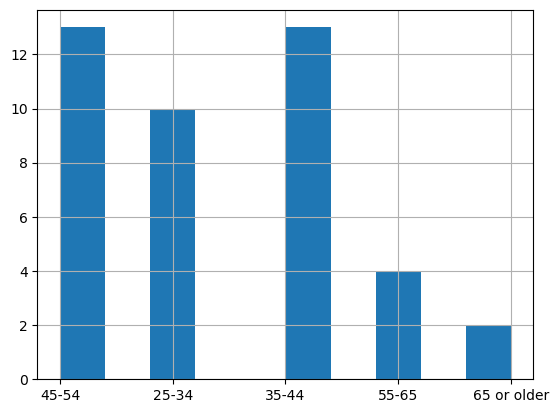

In [38]:
Data_2['Age'].hist()

<Axes: >

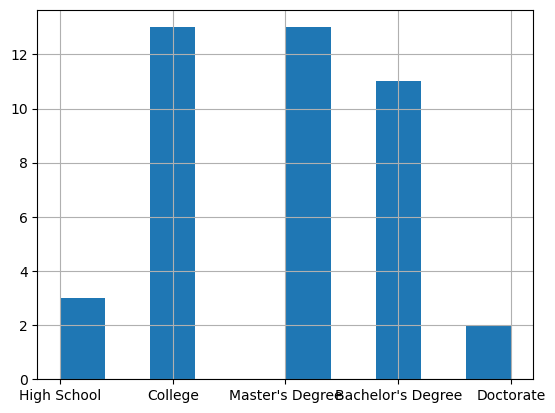

In [39]:
Data_2['Educational level'].hist()


In [44]:
# find average rentention rate amongst gender and ethnicity
Data_2.groupby(['Gender','Ethnicity']).agg({'Ad_Effect/Content':'mean','User_Remittance/Rentention':'mean'})

Ad_Effect/Content  \
Gender Ethnicity                                      
Female Asian                               2.000000   
       Black or African American           4.350000   
       Caucasian/White                     3.250000   
       Hispanic/Latino                     4.500000   
       Other (please specify)              1.000000   
Male   Asian                               4.625000   
       Black or African American           4.461538   
       Caucasian/White                     3.000000   
       Hispanic/Latino                     4.250000   

                                  User_Remittance/Rentention  
Gender Ethnicity                                              
Female Asian                                        4.166667  
       Black or African American                    4.100000  
       Caucasian/White                              4.250000  
       Hispanic/Latino                              4.000000  
       Other (please specify)                       3.500000  
Male   Asian                                        4.125000  
       Black or African American                    4.153846  
       Caucasian/White                              3.500000  
       Hispanic/Latino                              4.500000

In [45]:
# find average rentention rate amongst gender and educational level
Data_2.groupby(['Gender','Educational level']).agg({'Ad_Effect/Content':'mean','User_Remittance/Rentention':'mean'})

Ad_Effect/Content  User_Remittance/Rentention
Gender Educational level                                               
Female Bachelor's Degree           4.125000                    4.125000
       College                     4.500000                    4.500000
       High School                 5.000000                    4.000000
       Master's Degree             3.100000                    3.950000
Male   Bachelor's Degree           4.142857                    3.857143
       College                     4.400000                    4.450000
       Doctorate                   4.000000                    4.500000
       High School                 4.750000                    4.250000
       Master's Degree             4.833333                    4.000000

In [ ]:
# How to identify which gender and Ethnicity remits  money weekly


In [1]:
##normalization and standardization can be used to compare variables that are in different scales/units= Will delete

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
display(pd.DataFrame(MinMaxScaler().fit_transform(numeric),columns=numeric.columns))

In [ ]:
display(pd.DataFrame(StandardScaler().fit_transform(numeric),columns=numeric.columns))

In [ ]:
# to_dummies -> very important in machine learning to turn categorical variables into 
#numerical ones without giving them numeric meaning mainly used for machine learning models--will delete
pd.get_dummies(Data_2, columns = ['Ad Channel type'])-will delete


In [ ]:
import pandas as pd

# Assuming 'Data_3' is your DataFrame
# Map categorical values to ordinal values
ad_channel_mapping = {'Online Media': 3, 'Mixed Media': 2, 'Traditional Media': 1}

# Create a new column with ordinal values
Data_3['Ad_Channel_Ordinal'] = Data_3['Ad Channel type'].map(ad_channel_mapping)

# Perform one-way ANOVA using the new ordinal column
f_statistic, p_value = f_oneway(Data_3[Data_3['Remittance Frequency'] == 'Weekly']['Ad_Channel_Ordinal'],
                                Data_3[Data_3['Remittance Frequency'] == 'Monthly']['Ad_Channel_Ordinal'],
                                Data_3[Data_3['Remittance Frequency'] == 'Occasionally']['Ad_Channel_Ordinal'])

# Display ANOVA results
print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

# Check for statistical significance (using a significance level of 0.05)
if p_value < 0.05:
    print('There is a significant difference in the means of the Ad Channel type variable (ordinal) among different frequency groups of remittances.')
else:
    print('There is no significant difference in the means of the Ad Channel type variable (ordinal) among different frequency groups of remittances.')


In [ ]:
from scipy.stats import ttest_ind #==Shall delete

# Extract data for the two groups
frequent_remittance = Data_3[(Data_3['Remittance Frequency'] == 'Monthly') | (Data_3['Remittance Frequency'] == 'Weekly')]['Ad_Channel_Ordinal']
not_frequent_remittance = Data_3[Data_3['Remittance Frequency'] == 'Rarely']['Ad_Channel_Ordinal']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(frequent_remittance, not_frequent_remittance)

# Display t-test results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check for statistical significance (using a significance level of 0.05)
if p_value < 0.05:
    print('There is a significant difference in the influence of online advertising between users who frequently and do not frequently send remittances.')
else:
    print('There is no significant difference in the influence of online advertising between users who frequently and do not frequently send remittances.')


In [ ]:
from scipy.stats import f_oneway #Shall delete

# Create separate series for each age group
age_45_54 = Data_3[Data_3['Age'] == '45-54']['Ad_Channel_Ordinal']
age_25_34 = Data_3[Data_3['Age'] == '25-34']['Ad_Channel_Ordinal']
age_35_44 = Data_3[Data_3['Age'] == '35-44']['Ad_Channel_Ordinal']
age_55_65 = Data_3[Data_3['Age'] == '55-65']['Ad_Channel_Ordinal']
age_65_or_older = Data_3[Data_3['Age'] == '65 or older']['Ad_Channel_Ordinal']

# Perform ANOVA
f_statistic, p_value = f_oneway(age_45_54, age_25_34, age_35_44, age_55_65, age_65_or_older)

# Display ANOVA results
print(f'ANOVA F-statistic: {f_statistic}')
print(f'ANOVA p-value: {p_value}')

# Check for statistical significance (using a significance level of 0.05)
if p_value < 0.05:
    print('There is a significant difference in the influence of online advertising across different age groups.')
else:
    print('There is no significant difference in the influence of online advertising across different age groups.')